In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from matplotlib.ticker import FuncFormatter

In [71]:
top100_esg_df = pd.read_csv('ESG_Top_100_Stocks.csv')
top100_esg_df = top100_esg_df[(top100_esg_df['SMR Rtg'] == 'A') | (top100_esg_df['SMR Rtg'] == 'B')]
top100_esg_df = top100_esg_df[(top100_esg_df['Symbol'] != 'INFO') & (top100_esg_df['Symbol'] != 'BLL') & (top100_esg_df['Symbol'] != 'XLNX') & (top100_esg_df['Symbol'] != 'MCB') & (top100_esg_df['Symbol'] != 'ALTR')].reset_index()
top100_esg_df.drop(columns=['index'], inplace=True)
top100_esg_df

,Rank,Company,Symbol,Industry,ESG Score,Comp Rtg,RS Rtg,EPS Rtg,SMR Rtg,3-Yr EPS Growth Rate,ROE,Last Qtr Sales % Chg,Last Qtr EPS % Chg,Div Yld
0,1,Microsoft,MSFT,Computer Software-Desktop,76.3,99,84,94,A,25%,47%,21%,49%,0.7
1,2,Linde,LIN,Chemicals-Specialty,76,94,66,85,B,16,9,19,42,1.3
2,3,Accenture,ACN,Computer-Tech Services,75.95,97,84,81,A,9,33,21,26,1
3,4,J.B. Hunt,JBHT,Transportation-Trucking,74.14,89,68,81,B,6,21,36,41,0.7
4,5,Xylem,XYL,Machinery-Tools & Resources,73.89,87,87,79,B,-8,13,16,65,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,96,Tractor Supply,TSCO,Retail/Wholesale Building Products,62.21,89,78,87,A,27,46,13,10,1.1
84,97,Chipotle,CMG,Retail-Restaurants,62.12,99,89,98,B,21,16,39,1765,n.a.
85,98,Zoetis,ZTS,Medical-Ethical Drugs,62.06,95,80,91,A,14,57,26,34,0.5
86,99,Gentherm,THRM,Auto/Truck Original Equipment,61.95,92,88,77,A,12,14,96,383,n.a.


In [ ]:
random_idx = np.random.choice(87, replace=False, size=30)
chosen_stocks_df = top100_esg_df.iloc[random_idx]

In [85]:
#ensure SMR Ratings A & B only
chosen_stocks_df['SMR Rtg'].value_counts()

A    20
B    10
Name: SMR Rtg, dtype: int64

In [86]:
#Ensure at least 10 different industries
chosen_stocks_df['Industry'].value_counts()

Electronics-Semiconductor Mfg            3
Finance-Property REIT                    2
Security/Safety                          1
Finance-Investment Management            1
Commercial Services-Market Research      1
Building-Construction Products/Misc.     1
Retail-Major Discount Chains             1
Machinery-Tools & Resources              1
Electronics-Parts                        1
Computer Software-Database               1
Computer Software-Desktop                1
Medical-Ethical Drugs                    1
Building-Wood Products                   1
Retail-Discount & Variety                1
Computer-Networking                      1
Apparel-Shoes & Related Mfg              1
Medical-Products                         1
Pollution Control                        1
Electronics-Semiconductor Fabless Mfg    1
Medical-Research Equipment & Services    1
Medical-Systems/Equipment                1
Medical-Diversified                      1
Banks-Money Center                       1
Steel-Produ

In [87]:
#specify the symbol to read
tickers = chosen_stocks_df['Symbol']
# tickers.count()

#specify the time period
start_date = '2017-01-01'
end_date = '2021-12-31'

# Use pandas_reader.data.DataReader to load data
stocks_df = data.DataReader(tickers, 'yahoo', start_date, end_date)
stocks_df = stocks_df.loc['2017-01-01' : '2021-12-31']


In [94]:
stocks_prices_df = stocks_df['Adj Close']

In [95]:
#check for missing data
stocks_prices_df.isnull().sum()

Symbols
BCO     0
QGEN    0
CNHI    0
A       0
STM     0
FR      0
TX      0
GS      0
LLY     0
HOLX    0
TMO     0
SMTC    0
WM      0
ANET    0
NKE     0
APAM    0
FIVE    0
WFG     0
ARE     0
ZTS     0
ROG     0
ON      0
MSFT    0
ORCL    0
WCC     0
XYL     0
COST    0
MHK     0
IT      0
DE      0
dtype: int64

In [100]:
# Write generated random 30 stocks to csv to prevent it from changing everytime notebook is re ran.
# pd.DataFrame(stocks_prices_df.columns).to_csv('random_chosen_30_stocks.csv')


In [74]:
top100_esg_df[top100_esg_df['Symbol'].isin(chosen_30_stocks['Symbols'])][['Symbol','Industry','SMR Rtg']]

,Symbol,Industry,SMR Rtg
0,MSFT,Computer Software-Desktop,A
4,XYL,Machinery-Tools & Resources,B
7,STM,Electronics-Semiconductor Mfg,B
9,ROG,Electronics-Semiconductor Mfg,B
10,ORCL,Computer Software-Database,A
19,DE,Machinery-Farm,A
21,WFG,Building-Wood Products,A
26,NKE,Apparel-Shoes & Related Mfg,A
27,APAM,Finance-Investment Management,A
33,QGEN,Medical-Products,A


MONTE CARLO SIMULATION

In [67]:
chosen_30_stocks = pd.read_csv('random_chosen_30_stocks.csv')
chosen_30_stocks.drop(columns=['Unnamed: 0'], inplace=True)
chosen_30_stocks['Symbols']

0      BCO
1     QGEN
2     CNHI
3        A
4      STM
5       FR
6       TX
7       GS
8      LLY
9     HOLX
10     TMO
11    SMTC
12      WM
13    ANET
14     NKE
15    APAM
16    FIVE
17     WFG
18     ARE
19     ZTS
20     ROG
21      ON
22    MSFT
23    ORCL
24     WCC
25     XYL
26    COST
27     MHK
28      IT
29      DE
Name: Symbols, dtype: object

In [4]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
RANDOM_ASSETS = chosen_30_stocks['Symbols']
START_DATE = '2017-01-01'
END_DATE = '2021-12-31'
n_assets = len(RANDOM_ASSETS)

In [5]:
stocks_df = data.DataReader(RANDOM_ASSETS, 'yahoo', START_DATE, END_DATE)
stocks_df = stocks_df.loc['2017-01-01' : '2021-12-31']

In [46]:
returns_df = stocks_df['Adj Close'].pct_change().dropna()
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

In [7]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

In [8]:
portf_rtns = np.dot(weights, avg_returns)
portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T,np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns / portf_vol

In [9]:
portf_results_df = pd.DataFrame({'returns': portf_rtns, 'volatility': portf_vol, 'sharpe_ratio':portf_sharpe_ratio})

In [10]:
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []
portf_rtns_ef = np.linspace(portf_results_df.returns.min(), portf_results_df.returns.max(), N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)
for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
    
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


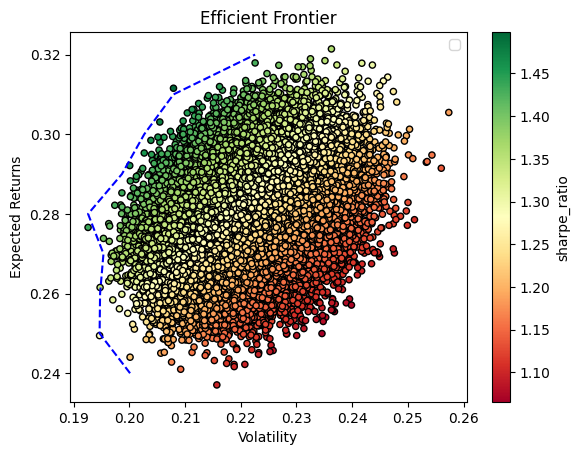

In [11]:

fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility',
                        y='returns', c='sharpe_ratio',
                        cmap='RdYlGn', edgecolors='black',
                        ax=ax)
ax.set(xlabel='Volatility',
         ylabel='Expected Returns',
         title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
# for asset_index in range(n_assets):
#     ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
#                 y=avg_returns[asset_index],
#                 s=150,
#                 color='black',
#                 label=RANDOM_ASSETS[asset_index]
#                 )
ax.legend()

In [12]:
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]
min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]
max_returns_ind = np.argmax(portf_results_df.returns)
max_returns_portf = portf_results_df.loc[max_returns_ind]

In [13]:
print('Maximum Sharpe ratio portfolio ----')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RANDOM_ASSETS, weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe ratio portfolio ----
Performance
returns: 31.16% volatility: 20.79% sharpe_ratio: 149.84% 
Weights
BCO: 0.96% QGEN: 1.30% CNHI: 0.29% A: 2.03% STM: 2.99% FR: 3.29% TX: 0.51% GS: 2.26% LLY: 7.88% HOLX: 3.74% TMO: 6.76% SMTC: 2.49% WM: 7.82% ANET: 7.99% NKE: 7.68% APAM: 2.45% FIVE: 5.49% WFG: 6.03% ARE: 0.31% ZTS: 2.85% ROG: 0.74% ON: 2.46% MSFT: 4.44% ORCL: 0.42% WCC: 0.38% XYL: 0.14% COST: 4.20% MHK: 0.78% IT: 4.53% DE: 6.79% 

In [28]:
print('Minimum Volatility ratio portfolio ----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RANDOM_ASSETS, weights[np.argmin(portf_results_df.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility ratio portfolio ----
Performance
returns: 27.66% volatility: 19.26% sharpe_ratio: 143.63% 
Weights
BCO: 0.86% QGEN: 6.99% CNHI: 2.81% A: 2.65% STM: 3.97% FR: 5.69% TX: 4.42% GS: 0.30% LLY: 5.53% HOLX: 0.42% TMO: 6.12% SMTC: 2.09% WM: 6.51% ANET: 4.34% NKE: 6.95% APAM: 0.74% FIVE: 0.00% WFG: 4.25% ARE: 5.87% ZTS: 3.30% ROG: 1.67% ON: 1.21% MSFT: 1.58% ORCL: 5.60% WCC: 0.15% XYL: 0.36% COST: 6.16% MHK: 2.94% IT: 2.83% DE: 3.70% 

In [15]:
print('Maximum Returns ratio portfolio ----')
print('Performance')
for index, value in max_returns_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RANDOM_ASSETS, weights[np.argmax(portf_results_df.returns)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Returns ratio portfolio ----
Performance
returns: 32.14% volatility: 23.63% sharpe_ratio: 136.04% 
Weights
BCO: 2.09% QGEN: 0.90% CNHI: 0.41% A: 4.52% STM: 4.97% FR: 1.12% TX: 3.64% GS: 0.84% LLY: 0.70% HOLX: 1.09% TMO: 2.87% SMTC: 4.34% WM: 4.61% ANET: 6.92% NKE: 6.05% APAM: 4.36% FIVE: 6.72% WFG: 3.48% ARE: 1.60% ZTS: 3.79% ROG: 2.68% ON: 6.81% MSFT: 5.42% ORCL: 0.26% WCC: 2.72% XYL: 3.47% COST: 1.87% MHK: 0.10% IT: 7.14% DE: 4.52% 

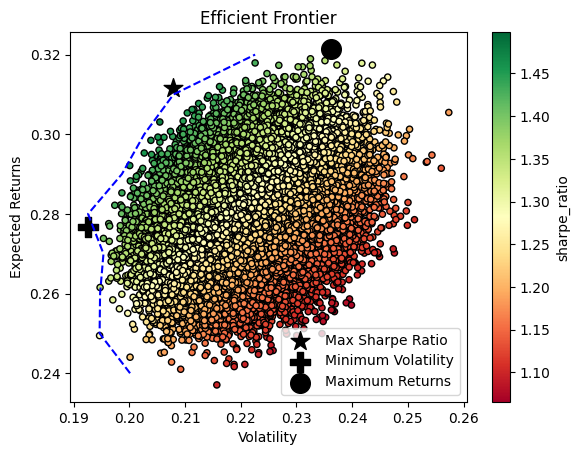

In [16]:
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility',
                         y='returns', c='sharpe_ratio',
                         cmap='RdYlGn', edgecolors='black',
                         ax=ax)
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
ax.scatter(x=max_sharpe_portf.volatility,
              y=max_sharpe_portf.returns,
              c='black', marker='*',
              s=200, label='Max Sharpe Ratio')
ax.scatter(x=min_vol_portf.volatility,
              y=min_vol_portf.returns,
              c='black', marker='P',
              s=200, label='Minimum Volatility')
ax.scatter(x=max_returns_portf.volatility,
              y=max_returns_portf.returns,
              c='black', marker='o',
              s=200, label='Maximum Returns')
ax.set(xlabel='Volatility', ylabel='Expected Returns',
          title='Efficient Frontier')
ax.legend()

In [24]:
import pyfolio as pf

/Users/kenneth/Documents/SMU/4.1/FA/Lab/financial-analytics/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [44]:
min_volatility_weights = weights[np.argmin(portf_results_df.volatility)]
max_sharpe_weights = weights[np.argmax(portf_results_df.sharpe_ratio)]
max_returns_weights = weights[np.argmax(portf_results_df.returns)]

In [47]:
min_vol_portf_returns = returns_df * min_volatility_weights
min_vol_portf_returns_pyfolio = min_vol_portf_returns.sum(axis = 1)
min_vol_portf_returns_pyfolio

Date
2017-01-04    0.009699
2017-01-05   -0.003081
2017-01-06    0.002719
2017-01-09   -0.001574
2017-01-10    0.001254
                ...   
2021-12-27    0.019437
2021-12-28   -0.005197
2021-12-29    0.006119
2021-12-30   -0.004091
2021-12-31    0.001640
Length: 1258, dtype: float64

In [48]:
max_sharpe_portf_returns = returns_df * max_sharpe_weights
max_sharpe_portf_returns_pyfolio = max_sharpe_portf_returns.sum(axis = 1)
max_sharpe_portf_returns_pyfolio

Date
2017-01-04    0.009331
2017-01-05   -0.005656
2017-01-06    0.004828
2017-01-09   -0.003333
2017-01-10    0.004279
                ...   
2021-12-27    0.022246
2021-12-28   -0.006623
2021-12-29    0.007921
2021-12-30   -0.004599
2021-12-31    0.000738
Length: 1258, dtype: float64

In [49]:
max_returns_portf_returns = returns_df * max_returns_weights
max_returns_portf_returns_pyfolio = max_returns_portf_returns.sum(axis = 1)
max_returns_portf_returns_pyfolio

Date
2017-01-04    0.008999
2017-01-05   -0.010871
2017-01-06    0.005319
2017-01-09   -0.001628
2017-01-10    0.007566
                ...   
2021-12-27    0.022762
2021-12-28   -0.006334
2021-12-29    0.008385
2021-12-30   -0.006248
2021-12-31    0.001404
Length: 1258, dtype: float64

/Users/kenneth/Documents/SMU/4.1/FA/Lab/financial-analytics/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2017-01-04
End date,2021-12-31
Total months,59
,Backtest
Annual return,29.4%
Cumulative returns,262.2%
Annual volatility,19.3%
Sharpe ratio,1.44
Calmar ratio,0.90
Stability,0.89
Max drawdown,-32.7%


/Users/kenneth/Documents/SMU/4.1/FA/Lab/financial-analytics/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


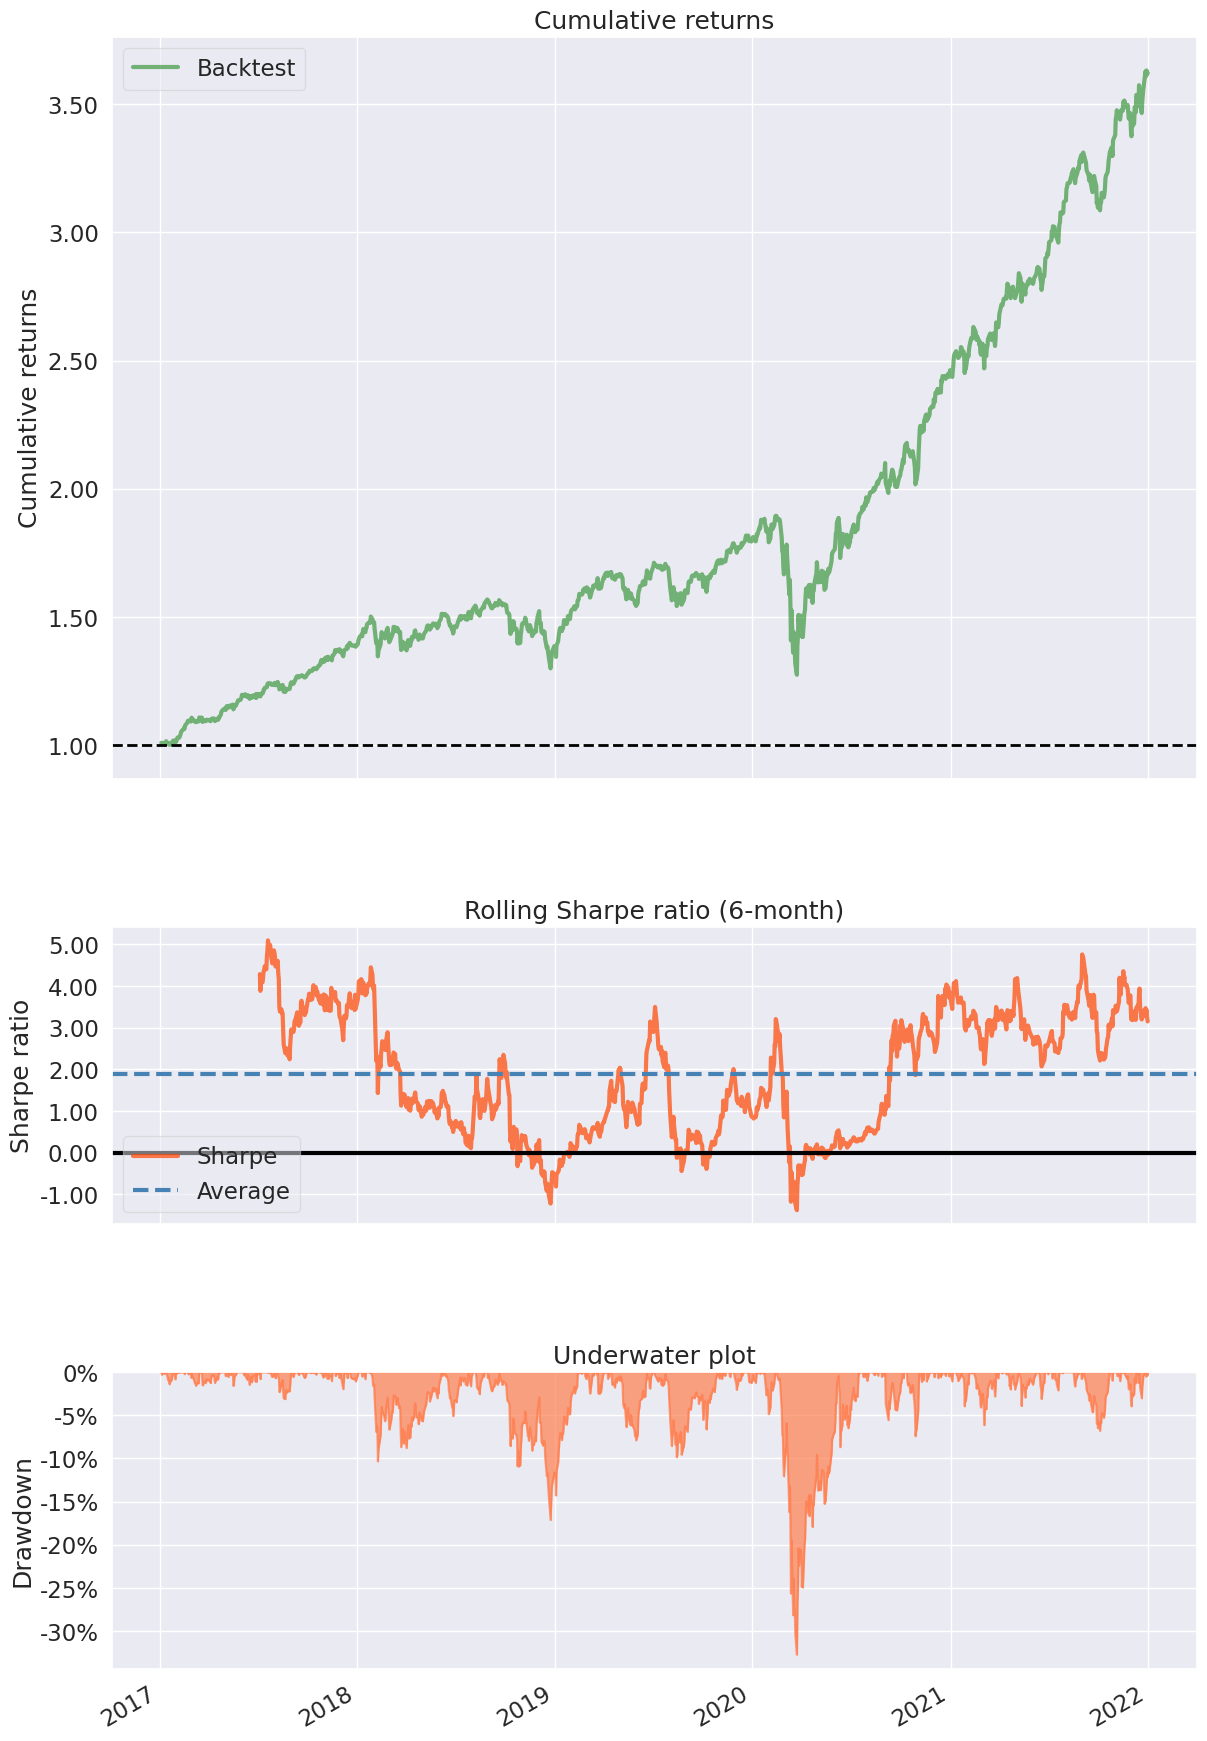

In [50]:
pf.create_simple_tear_sheet(min_vol_portf_returns_pyfolio)

/Users/kenneth/Documents/SMU/4.1/FA/Lab/financial-analytics/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2017-01-04
End date,2021-12-31
Total months,59
,Backtest
Annual return,34.1%
Cumulative returns,332.0%
Annual volatility,23.6%
Sharpe ratio,1.36
Calmar ratio,0.87
Stability,0.87
Max drawdown,-39.3%


/Users/kenneth/Documents/SMU/4.1/FA/Lab/financial-analytics/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


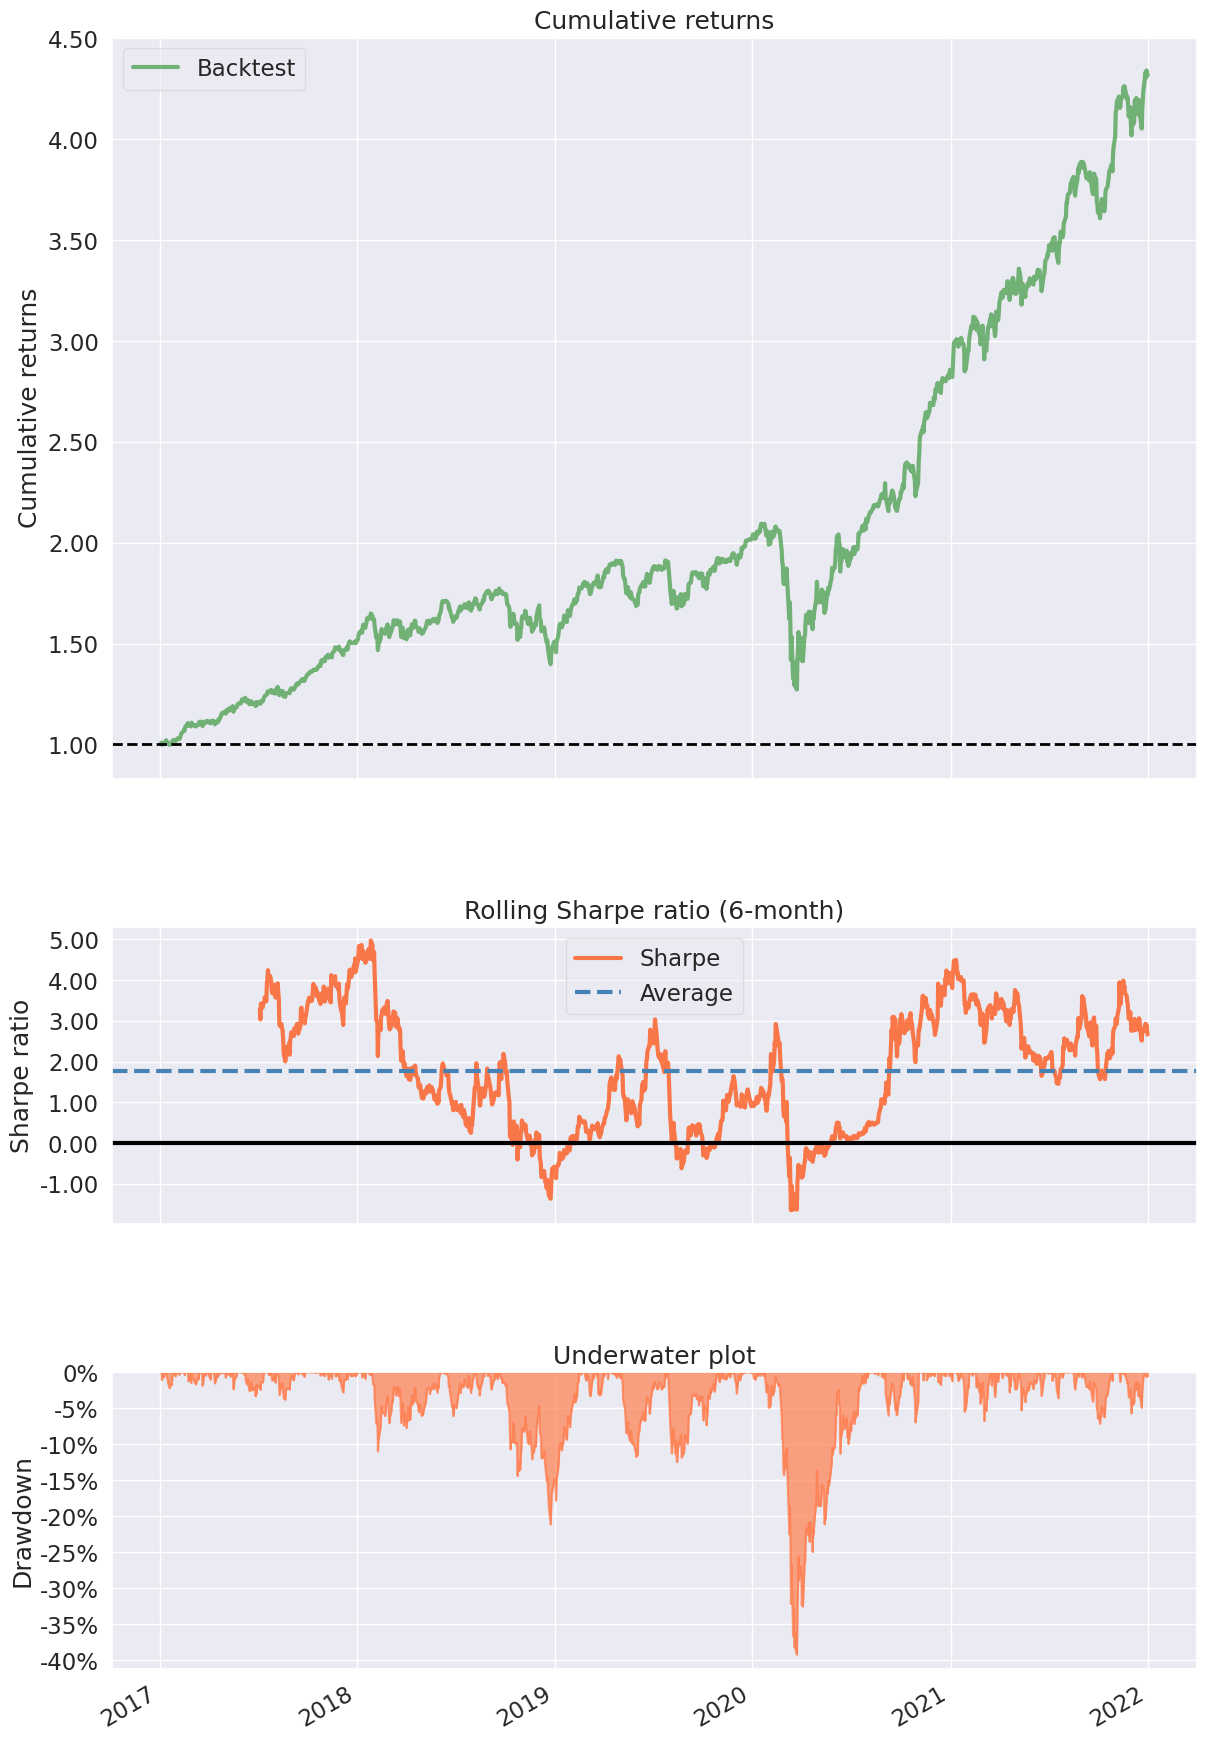

In [34]:
pf.create_simple_tear_sheet(max_returns_portf_returns_pyfolio)

/Users/kenneth/Documents/SMU/4.1/FA/Lab/financial-analytics/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2017-01-04
End date,2021-12-31
Total months,59
,Backtest
Annual return,33.6%
Cumulative returns,324.6%
Annual volatility,20.8%
Sharpe ratio,1.50
Calmar ratio,0.93
Stability,0.92
Max drawdown,-36.0%


/Users/kenneth/Documents/SMU/4.1/FA/Lab/financial-analytics/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


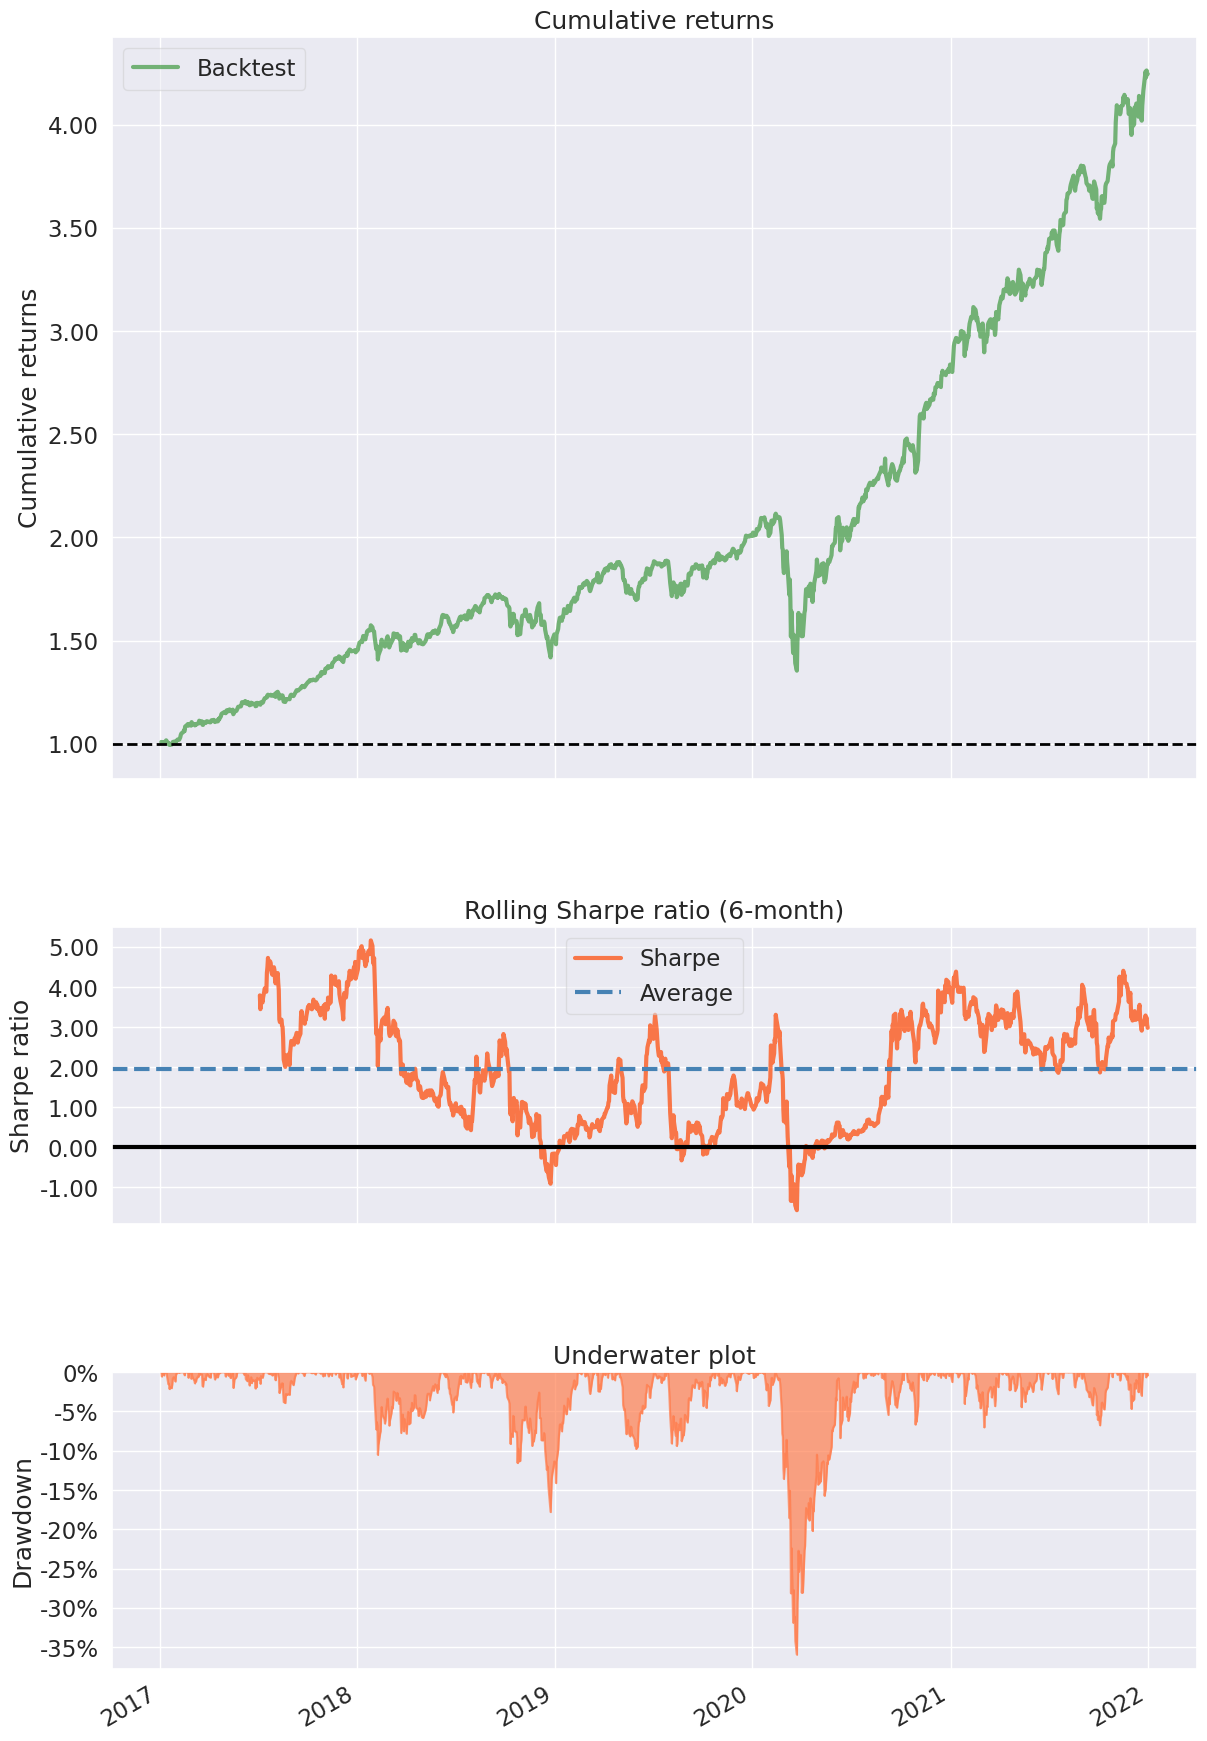

In [35]:
pf.create_simple_tear_sheet(max_sharpe_portf_returns_pyfolio)

In [125]:
top3_portfolios = pd.DataFrame()
top3_portfolios['Portfolio 1'] = pf.timeseries.perf_stats(min_vol_portf_returns_pyfolio)
top3_portfolios['Portfolio 2'] = pf.timeseries.perf_stats(max_sharpe_portf_returns_pyfolio)
top3_portfolios['Portfolio 3'] = pf.timeseries.perf_stats(max_returns_portf_returns_pyfolio)

/Users/kenneth/Documents/SMU/4.1/FA/Lab/financial-analytics/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/Users/kenneth/Documents/SMU/4.1/FA/Lab/financial-analytics/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/Users/kenneth/Documents/SMU/4.1/FA/Lab/financial-analytics/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [126]:
top3_portfolios.iloc[0:3] = top3_portfolios.iloc[0:3] * 100

In [127]:
top3_portfolios.round(2)

,Portfolio 1,Portfolio 2,Portfolio 3
Annual return,29.41,33.59,34.06
Cumulative returns,262.25,324.56,332.02
Annual volatility,19.26,20.79,23.63
Sharpe ratio,1.44,1.50,1.36
Calmar ratio,0.90,0.93,0.87
Stability,0.89,0.92,0.87
Max drawdown,-0.33,-0.36,-0.39
Omega ratio,1.33,1.34,1.30
Sortino ratio,2.04,2.13,1.92
Skew,-0.69,-0.74,-0.79


BETA Calculation

In [85]:
#specify the symbol to read
tickers = ['SPY']
# tickers.count()

#specify the time period
start_date = '2017-01-01'
end_date = '2021-12-31'

# Use pandas_reader.data.DataReader to load data
spy_df = data.DataReader(tickers, 'yahoo', start_date, end_date)
spy_df = spy_df.loc['2017-01-01' : '2021-12-31']
spy_price_df = spy_df['Adj Close']

In [90]:
spy_returns = spy_price_df.pct_change().dropna()
spy_returns['Min Vol'] = min_vol_portf_returns_pyfolio
spy_returns['Max Sharpe'] = max_sharpe_portf_returns_pyfolio
spy_returns['Max Returns'] = max_returns_portf_returns_pyfolio

In [92]:
spy_returns.cov()

Symbols,SPY,Min Vol,Max Sharpe,Max Returns
Symbols,,,,
SPY,0.000141,0.000136,0.000147,0.000165
Min Vol,0.000136,0.000147,0.000156,0.000174
Max Sharpe,0.000147,0.000156,0.000172,0.000191
Max Returns,0.000165,0.000174,0.000191,0.000222


In [96]:
benchmark_variance = spy_returns['SPY'].var()
min_vol_cov = spy_returns.cov().iloc[1,0]
max_sharpe_cov = spy_returns.cov().iloc[2,0]
max_returns_cov = spy_returns.cov().iloc[3,0]
print(min_vol_cov, max_sharpe_cov, max_returns_cov)

0.00013597344135441244 0.00014691772902785793 0.0001647852962441


In [101]:
min_vol_beta = min_vol_cov / benchmark_variance
max_sharpe_beta = max_sharpe_cov / benchmark_variance
max_returns_beta = max_returns_cov / benchmark_variance

In [106]:
print(f'Min Volatility Portf Beta : {min_vol_beta:.2f} \n Max Sharpe Ratio Portf Beta : {max_sharpe_beta:.2f} \n Max Returns Portf Beta : {max_returns_beta:.2f}')

Min Volatility Portf Beta : 0.96 
 Max Sharpe Ratio Portf Beta : 1.04 
 Max Returns Portf Beta : 1.17


Q-Q Plot to check distribution

In [109]:
import statsmodels.api as sm

In [133]:
top3_portfolios_returns = pd.DataFrame()
top3_portfolios_returns['Portfolio 1'] = min_vol_portf_returns_pyfolio
top3_portfolios_returns['Portfolio 2'] = max_sharpe_portf_returns_pyfolio
top3_portfolios_returns['Portfolio 3'] = max_returns_portf_returns_pyfolio

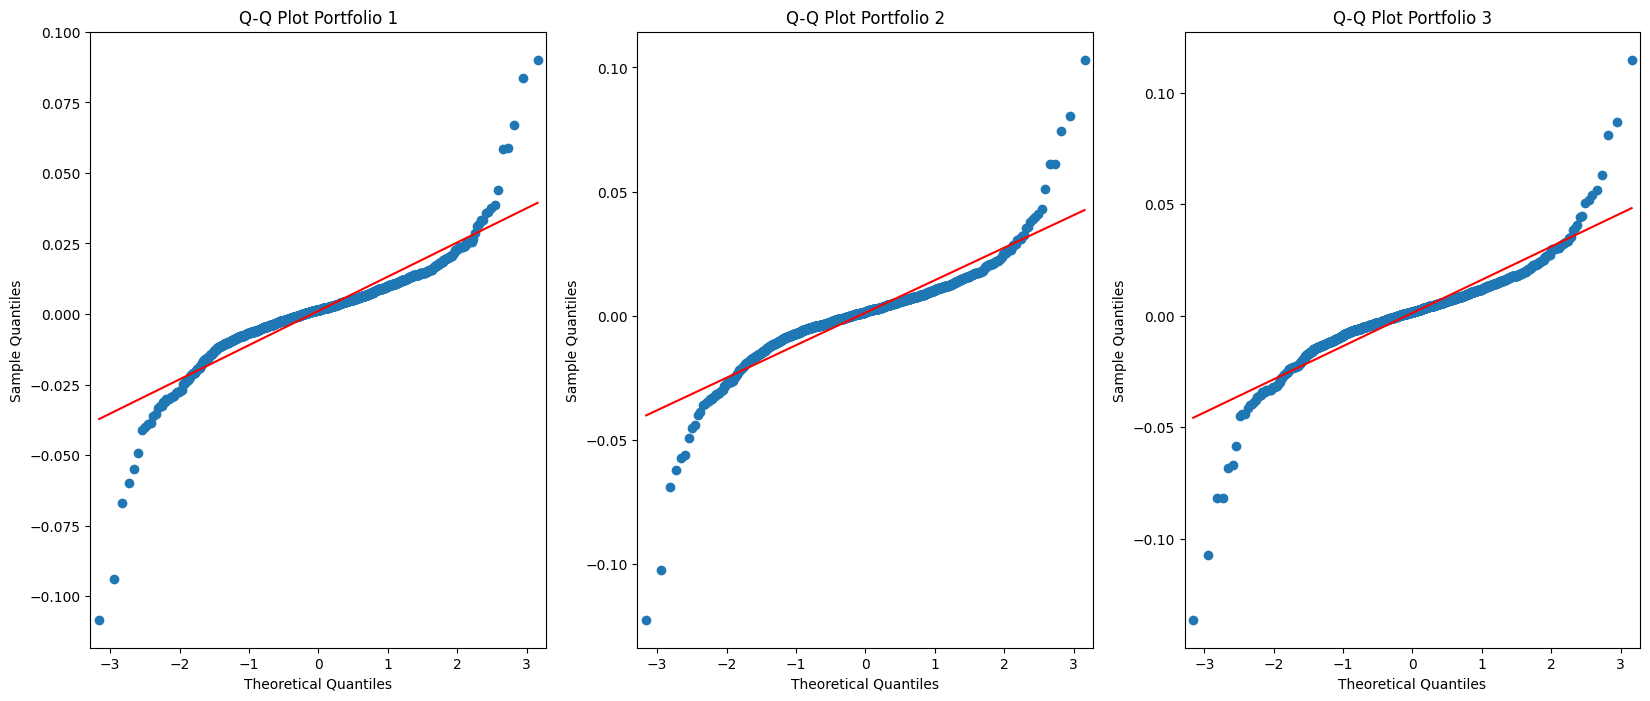

<Figure size 1600x500 with 0 Axes>

In [134]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))
plt.figure(figsize=(16,5))
sm.qqplot(top3_portfolios_returns['Portfolio 1'], line = 's', ax = ax[0])
ax[0].set_title('Q-Q Plot Portfolio 1')
sm.qqplot(top3_portfolios_returns['Portfolio 2'], line = 's', ax = ax[1])
ax[1].set_title('Q-Q Plot Portfolio 2')
sm.qqplot(top3_portfolios_returns['Portfolio 3'], line = 's', ax = ax[2])
ax[2].set_title('Q-Q Plot Portfolio 3')
plt.show()

Cum Return Series

In [135]:
top_3_cum_ret = (top3_portfolios_returns + 1).cumprod() - 1

<AxesSubplot:title={'center':'Cum Return 5 Years'}, xlabel='Date'>

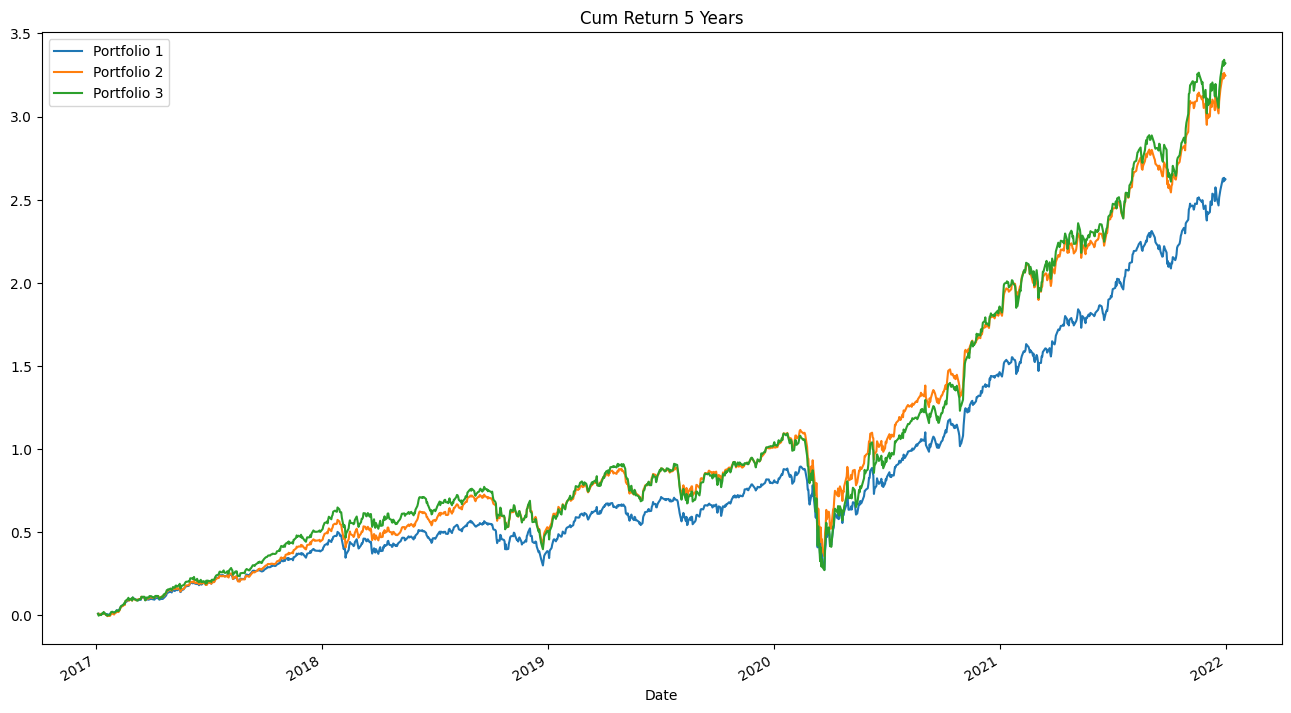

In [136]:
top_3_cum_ret.plot(figsize=(16,9), title = 'Cum Return 5 Years')